In [72]:
from src.plotting.visutil import CSVPlotter
from src.plotting.postprocess import PostProcessor
from config.plotsetting import object_dict
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Produce ABCD table

Region A is defined as: OS + 2 b-tagged \
Region B is defined as: OS + 1 b-tagged \
Region C is defined as: SS + 2 b-tagged \
Region D is defined as: SS + 1 b-tagged

In [4]:
def add_inv_mass(df):
    # get deltaR and select OS
    from src.analysis.objutil import Object
    df.rename(columns=lambda x: x.replace('LDTau', 'LeadingTau'), inplace=True)
    df.rename(columns=lambda x: x.replace('SDTau', 'SubleadingTau'), inplace=True)
    leading_tau = Object.fourvector(df, 'LeadingTau', sort=False)
    subleading_tau = Object.fourvector(df, 'SubleadingTau', sort=False)
    df['Tau_dR'] = leading_tau.deltaR(subleading_tau)
    ld_jet = Object.fourvector(df, 'LDBjetBYtag', sort=False)
    sd_jet = Object.fourvector(df, 'SDBjetBYtag', sort=False)
    df['Bjet_dR'] = ld_jet.deltaR(sd_jet)
    df['Tau_InvM'] = (leading_tau+subleading_tau).mass
    df['Bjet_InvM'] = (ld_jet+sd_jet).mass
    df['OS'] = df['LeadingTau_charge']*df['SubleadingTau_charge'] < 0

In [5]:
def selOS(df):
    add_inv_mass(df)
    OS_df = df[df['OS']]
    return OS_df

def selSS(df):
    add_inv_mass(df)
    SS_df = df[~df['OS']]
    return SS_df

In [18]:
def regroup(df, keywords, new_value):
    mask = df['dataset'].apply(lambda x: any(keyword in x for keyword in keywords))
    df.loc[mask, 'group'] = new_value
    return df

In [26]:
cp = CSVPlotter(outdir='/Users/yuntongzhou/Desktop/Dihiggszztt/output/plots')
dfB = cp.postprocess_csv(datasource='/Users/yuntongzhou/Desktop/Dihiggszztt/output/datasource/prelim_onelooseb',
                         per_evt_wgt='Generator_weight_values', extraprocess=selOS, selname='OS Tau')
dfA = cp.postprocess_csv(datasource='/Users/yuntongzhou/Desktop/Dihiggszztt/output/datasource/prelim_twolooseb',
                         per_evt_wgt='Generator_weight_values', extraprocess=selOS, selname='OS Tau')

In [28]:
dfB = regroup(dfB, ['ZH_HToBB_ZToQQ', 'ZZto4L', 'ZZto2L2Nu', 'ZZto2Nu2Q'], 'Others')

In [31]:
dfA = regroup(dfA, ['ZH_HToBB_ZToQQ', 'ZZto4L', 'ZZto2L2Nu', 'ZZto2Nu2Q'], 'Others')

In [32]:
# save dataframes for further processing
dfB.to_csv("/Users/yuntongzhou/Desktop/Dihiggszztt/output/training/RegionB.csv")
dfA.to_csv("/Users/yuntongzhou/Desktop/Dihiggszztt/output/training/RegionA.csv")

In [106]:
dfB[dfB.group=='ZZ']['weight'].sum()

4100.027929428925

In [108]:
# calculate total cutflow
inputpath1='/Users/yuntongzhou/Desktop/Dihiggszztt/output/datasource/prelim_onelooseb_extrasel'
pp = PostProcessor()
pp.merge_cf(inputdir=inputpath1, outputdir=inputpath1)
inputpath2='/Users/yuntongzhou/Desktop/Dihiggszztt/output/datasource/prelim_twolooseb_extrasel'
pp.merge_cf(inputdir=inputpath2, outputdir=inputpath2)

,DYJetsToLL_M-50,DYJetsToLL_M-50_eff,TTtoLNu2Q,TTtoLNu2Q_eff,TTto2L2N,TTto2L2N_eff,TTto4Q,TTto4Q_eff,ttHto2B,ttHto2B_eff,...,GluGlutoHHto2B2Tau,GluGlutoHHto2B2Tau_eff,ZZto4L,ZZto4L_eff,ZZto2L2Nu,ZZto2L2Nu_eff,ZZto2Nu2Q,ZZto2Nu2Q_eff,ZZto2L2Q,ZZto2L2Q_eff
initial,1.265228e+06,1.000000,253077.464867,1.000000,65441.262547,1.000000,262085.535948,1.000000,113.829401,1.000000,...,29.516917,1.000000,87.172233,1.000000,276.025042,1.000000,251.611693,1.000000,847.044357,1.000000
>= 2 Medium hadronic Taus,1.692649e+05,0.133782,6508.619922,0.025718,13377.793789,0.204424,1099.154796,0.004194,3.181440,0.027949,...,13.857574,0.469479,30.061921,0.344857,94.768885,0.343334,1.514468,0.006019,198.010414,0.233766
Tau dR >= 0.5,1.692649e+05,1.000000,6507.953357,0.999898,13377.048645,0.999944,1098.635349,0.999527,3.181440,1.000000,...,13.855574,0.999856,30.058816,0.999897,94.747960,0.999779,1.514468,1.000000,197.904164,0.999463
>=2 ak4 jets,4.410839e+04,0.260588,5957.375214,0.915399,10525.578865,0.786839,1070.065630,0.973995,3.132387,0.984581,...,12.177184,0.878865,13.103477,0.435928,23.631687,0.249416,0.403858,0.266667,147.341762,0.744511
>=2 Loose B-tagged,2.626504e+03,0.059547,2474.935247,0.415441,5563.722480,0.528591,415.559478,0.388350,0.798864,0.255034,...,6.933879,0.569416,1.363134,0.104028,1.186816,0.050221,0.100965,0.250000,20.632947,0.140035
OS Tau,2.542166e+03,0.967890,1992.679568,0.805144,5384.480210,0.967784,245.180093,0.590000,0.686743,0.859649,...,6.750938,0.973616,0.902028,0.661731,1.124037,0.947103,0.100965,1.000000,19.655485,0.952626


In [109]:
def ABCDTable():
    AC_df = pd.read_csv(f'{inputpath2}/scaledyield.csv')
    AC_df.drop(columns=['Sig Eff', 'Bkg Eff'], inplace=True)
    AC_df = AC_df.apply(pd.to_numeric, errors='coerce')
    BD_df = pd.read_csv(f'{inputpath1}/scaledyield.csv')
    BD_df = BD_df.apply(pd.to_numeric, errors='coerce')
    BD_df.drop(columns=['Sig Eff', 'Bkg Eff'], inplace=True)
    A_row = AC_df.iloc[-1]
    C_row = AC_df.iloc[-2]-AC_df.iloc[-1]
    B_row = BD_df.iloc[-1]
    D_row = BD_df.iloc[-2]-BD_df.iloc[-1]
    ABCD_tab = pd.DataFrame([A_row, B_row, C_row, D_row])
    ABCD_tab['SvB Ratio'] = ABCD_tab['Tot Sig']/ABCD_tab['Tot Bkg']
    ABCD_tab.index = ['Region A', 'Region B', 'Region C', 'Region D']
    ABCD_tab = ABCD_tab.dropna(axis=1, how='any')
    ABCD_tab.to_csv('/Users/yuntongzhou/Desktop/Dihiggszztt/output/ABCD.csv')
    return ABCD_tab

In [110]:
ABCDTable()

,DYJets,SingleH,TTbar,WW,WWW,WZ,Tot Bkg,ggF,ZH,ZZ,Tot Sig,SvB Ratio
Region A,2542.166270,66.112722,7622.339871,11.455759,0.456910,58.877173,10301.408704,6.750938,12.754023,21.782515,41.287476,0.004008
Region B,12638.542262,331.089209,5329.562496,72.556388,3.236442,297.803209,18672.790007,3.453599,6.896976,49.916996,60.267571,0.003228
Region C,84.337270,5.339009,831.877334,2.464453,0.342682,9.207665,933.568414,0.182941,0.296541,1.501346,1.980828,0.002122
Region D,734.939064,10.094546,851.857929,10.348755,1.675335,52.667017,1661.582647,0.097930,0.271563,4.742555,5.112047,0.003077


In [33]:
dfD = cp.postprocess_csv(datasource='/Users/yuntongzhou/Desktop/Dihiggszztt/output/datasource/prelim_onelooseb',
                         per_evt_wgt='Generator_weight_values', extraprocess=selSS, selname='SS Tau')
dfC = cp.postprocess_csv(datasource='/Users/yuntongzhou/Desktop/Dihiggszztt/output/datasource/prelim_twolooseb',
                         per_evt_wgt='Generator_weight_values', extraprocess=selSS, selname='SS Tau')

dfC = regroup(dfC, ['ZH_HToBB_ZToQQ', 'ZZto4L', 'ZZto2L2Nu', 'ZZto2Nu2Q'], 'Others')
dfD = regroup(dfD, ['ZH_HToBB_ZToQQ', 'ZZto4L', 'ZZto2L2Nu', 'ZZto2Nu2Q'], 'Others')

dfC.to_csv("/Users/yuntongzhou/Desktop/Dihiggszztt/output/training/RegionC.csv")
dfD.to_csv("/Users/yuntongzhou/Desktop/Dihiggszztt/output/training/RegionD.csv")

## Make Plots for Background vs Signal Distribution in four regions

In [155]:
from config.plotsetting import tau_gen, bjetbytag_btag, H_mass, dR

In [156]:
bkg_only = {"DYJets": ["DYJets"], "TTbar": ["TTbar"], "SingleH": ["SingleH"], "Others": ["WZ", "WWW", "WW", "Others"], "QCD": ["QCD"]}
sig_only = {r"HH $\times 100$": ["ggF"], r"ZH $\times 100$": ["ZH"], r"ZZ $\times 100$": ["ZZ"]}
sig_total = {"Signal x 10": ["ZH", "ggF", "ZZ"]}
QCD_excluded = {"DYJets": ["DYJets"], "TTbar": ["TTbar"], "SingleH": ["SingleH"], "Others": ["WZ", "WWW", "WW", "Others"]}

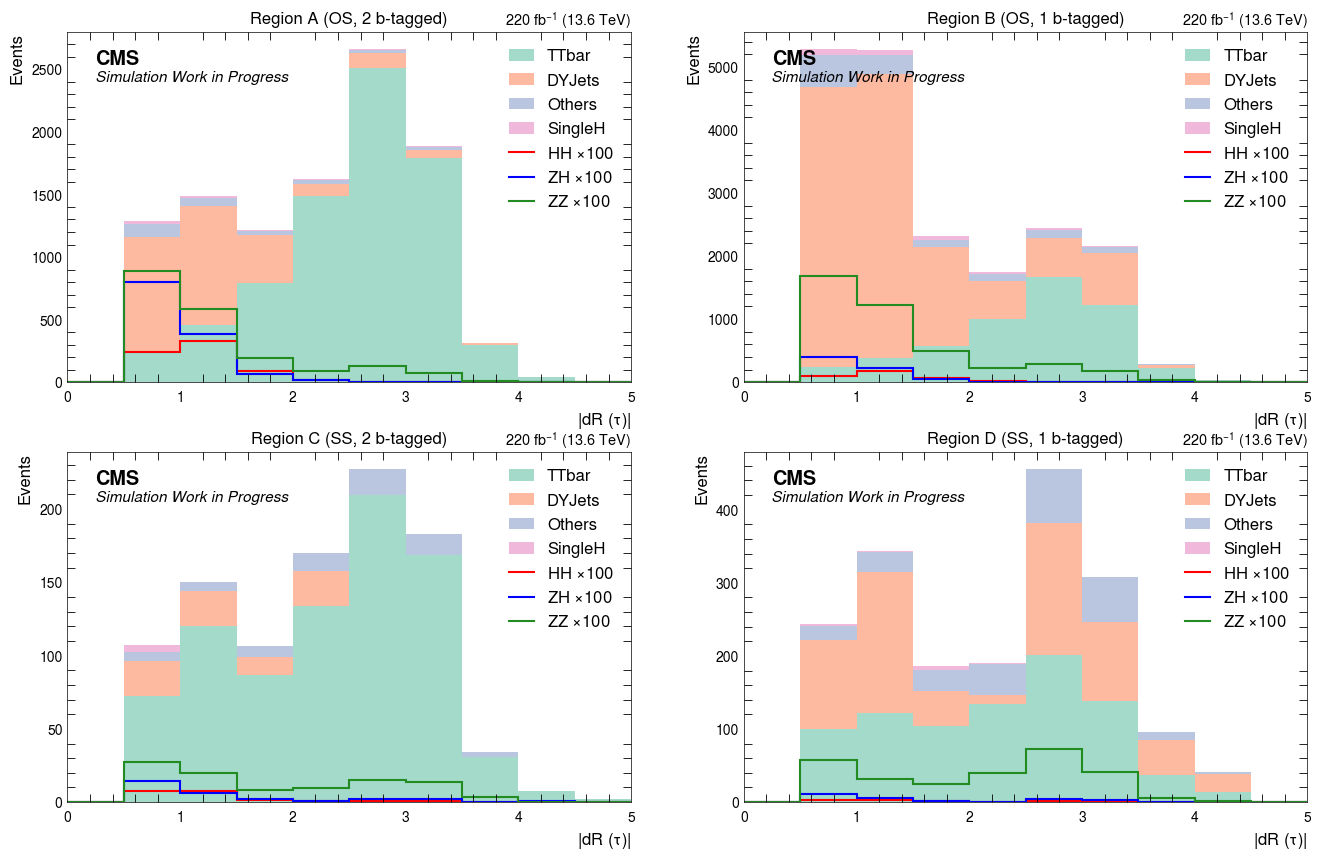

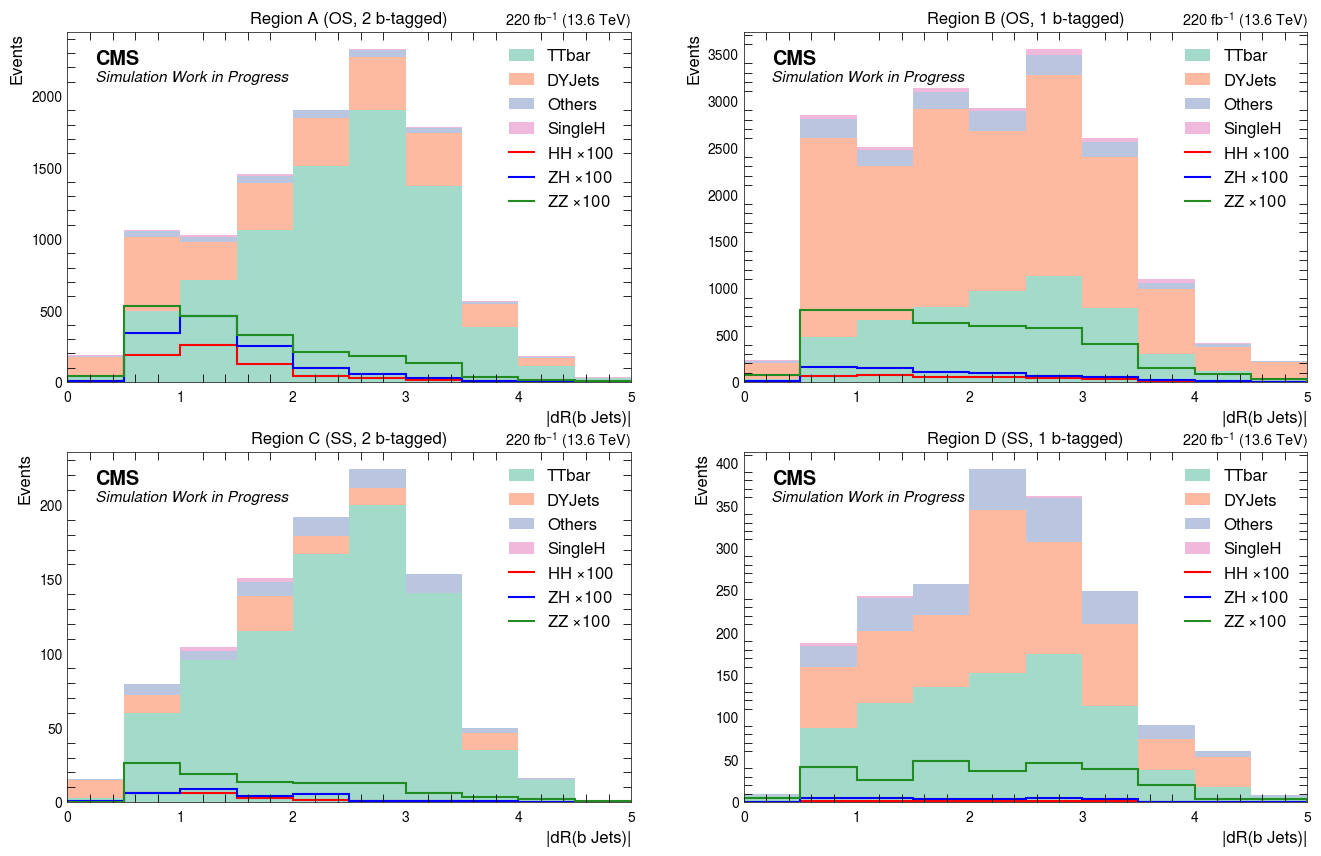

In [157]:
cp.plot_fourRegions(dfA, dfB, dfC, dfD, dR, QCD_excluded, sig_only, save_name='formal')

## Compare shape discrepancies between all four regions for TTbar dataset

In [168]:
filteredA = dfA[dfA.group=='TTbar']
filteredB = dfB[dfB.group=='TTbar']
filteredC = dfC[dfC.group=='TTbar']
filteredD = dfD[dfD.group=='TTbar']

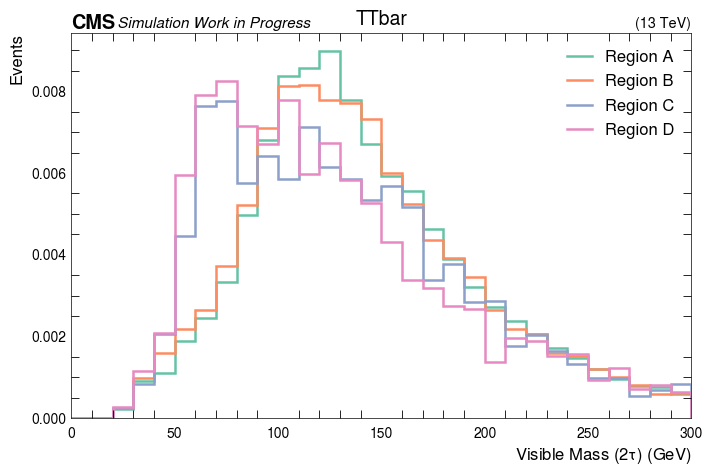

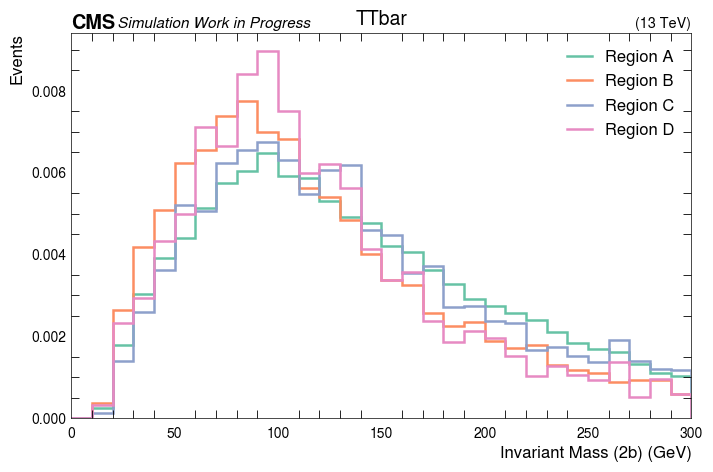

In [172]:
cp.plot_shape([filteredA, filteredB, filteredC, filteredD], ['Region A', 'Region B', 'Region C', 'Region D'], H_mass, title='TTbar', save_name='TTbarRegionComp')

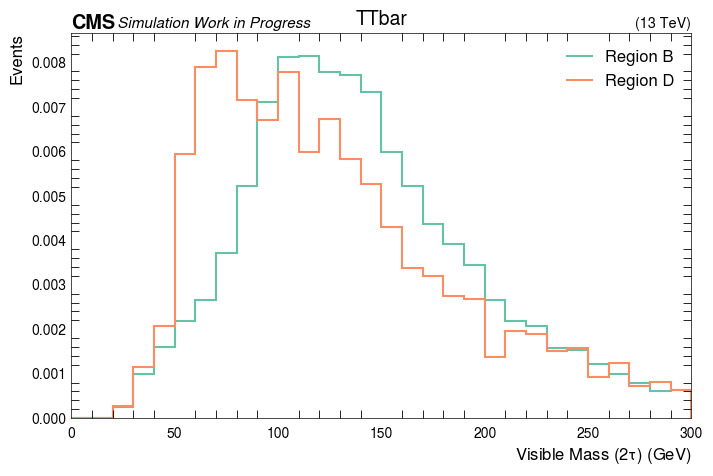

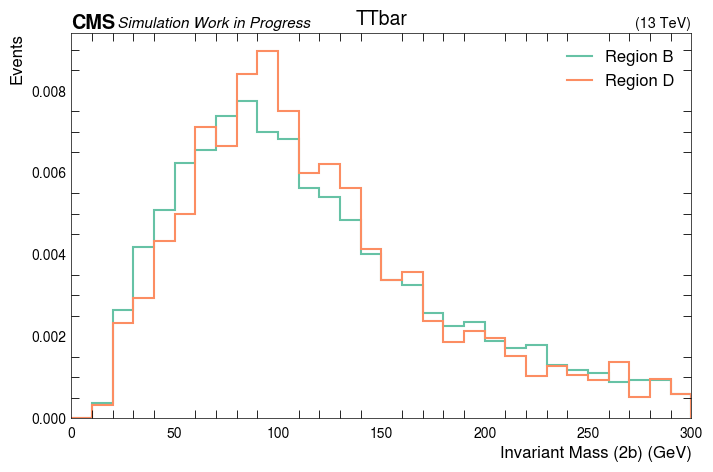

In [177]:
cp.plot_shape([filteredB, filteredD], ['Region B', 'Region D'], H_mass, title='TTbar', save_name='TTbarRegionBvD')